# **1. Perkenalan Dataset**


*Eva Meivina Dwiana_mc009d5x0328*




Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [27]:
bank_data_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/proyekbelajarpemula/refs/heads/main/bank_data.csv")
bank_data_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [28]:
print("Dimensi data (jumlah baris & kolom):", bank_data_df.shape)
bank_data_df.info()

Dimensi data (jumlah baris & kolom): (2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 

In [29]:
jumlah_duplikat = bank_data_df.duplicated().sum()
print("Jumlah baris duplikat:", jumlah_duplikat)

Jumlah baris duplikat: 0


In [30]:
bank_data_df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [31]:
bank_data_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


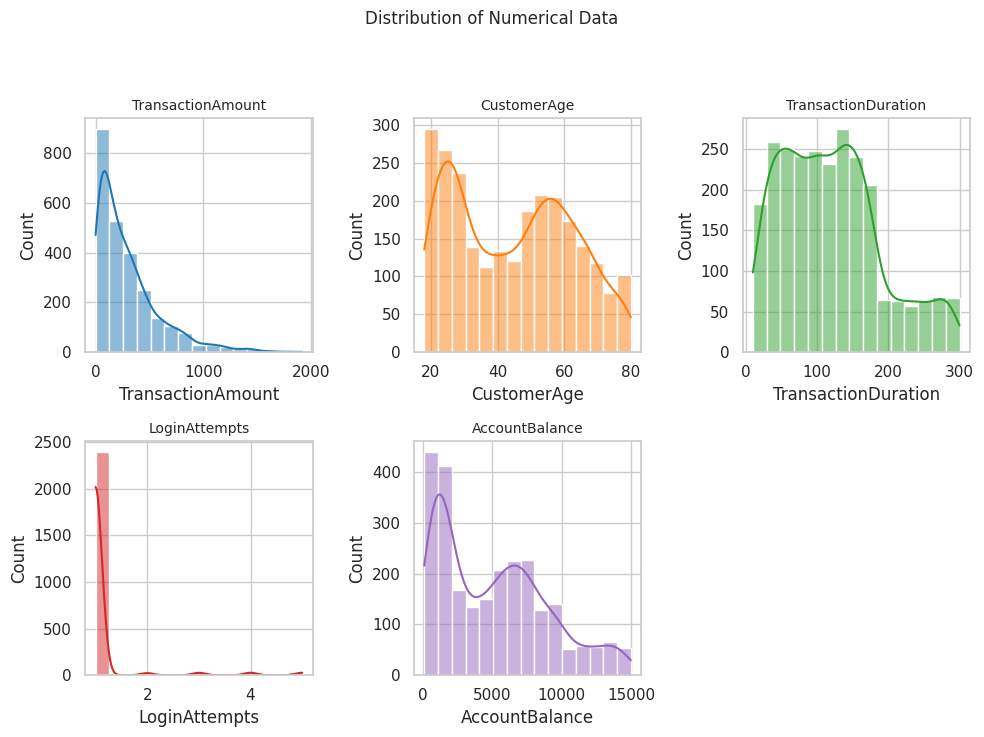

In [32]:
fitur_angka = bank_data_df.select_dtypes('number').columns

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 7))
for idx, kolom in enumerate(fitur_angka):
    plt.subplot(2, 3, idx + 1)
    sns.histplot(bank_data_df[kolom], bins=15, kde=True, color=color[idx % len(color)])
    plt.title(f"{kolom}", fontsize=10)

plt.suptitle("Distribution of Numerical Data", fontsize=12, y=1.05)
plt.tight_layout()
plt.show()

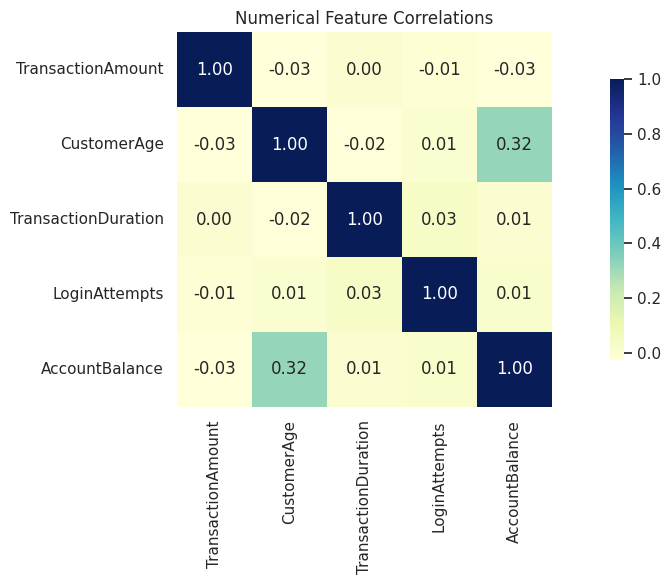

In [33]:
num_cols_only = bank_data_df.select_dtypes('number')

corr_result = num_cols_only.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 6))
heat = sns.heatmap(
    corr_result,
    ax=ax,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    square=True,
    cbar_kws={"shrink": .75}
)
ax.set_title("Numerical Feature Correlations", fontsize=12)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [34]:
df_proc = bank_data_df.copy()

In [35]:
columns_to_exclude = {
    'TransactionID', 'AccountID', 'TransactionDate', 'Location',
    'DeviceID', 'IP Address', 'MerchantID', 'Channel',
    'PreviousTransactionDate', 'TransactionDuration', 'TransactionType'
}
existing_cols = list(set(columns_to_exclude).intersection(bank_data_df.columns))
cleaned_df = bank_data_df.drop(existing_cols, axis=1)

if 'CustomerOccupation' in cleaned_df.columns:
    occ_vals = cleaned_df['CustomerOccupation']
    if len(occ_vals.unique()) > 5:
        encoded_vals = occ_vals.map(occ_vals.value_counts())
        cleaned_df['CustomerOccupation'] = encoded_vals
    else:
        encoded_df = pd.get_dummies(cleaned_df['CustomerOccupation'], prefix='Occ')
        cleaned_df = pd.concat([cleaned_df.drop(columns='CustomerOccupation'), encoded_df], axis=1)

for num_col in cleaned_df.select_dtypes(include='number'):
    stats = cleaned_df[num_col].describe()
    iqr_range = stats['75%'] - stats['25%']
    out_low = stats['25%'] - 1.5 * iqr_range
    out_high = stats['75%'] + 1.5 * iqr_range
    cleaned_df[num_col] = cleaned_df[num_col].apply(lambda x: out_low if x < out_low else (out_high if x > out_high else x))

cleaned_df.head(10)

,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance,Occ_Doctor,Occ_Engineer,Occ_Retired,Occ_Student
0,14.09,70,1.0,5112.21,True,False,False,False
1,376.24,68,1.0,13758.91,True,False,False,False
2,126.29,19,1.0,1122.35,False,False,False,True
3,184.50,26,1.0,8569.06,False,False,False,True
4,13.45,26,1.0,7429.40,False,False,False,True
5,92.15,18,1.0,781.68,False,False,False,True
6,7.08,37,1.0,13316.71,True,False,False,False
7,171.42,67,1.0,2796.24,False,False,True,False
8,106.23,51,1.0,9095.14,False,True,False,False
9,815.96,55,1.0,1021.88,True,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

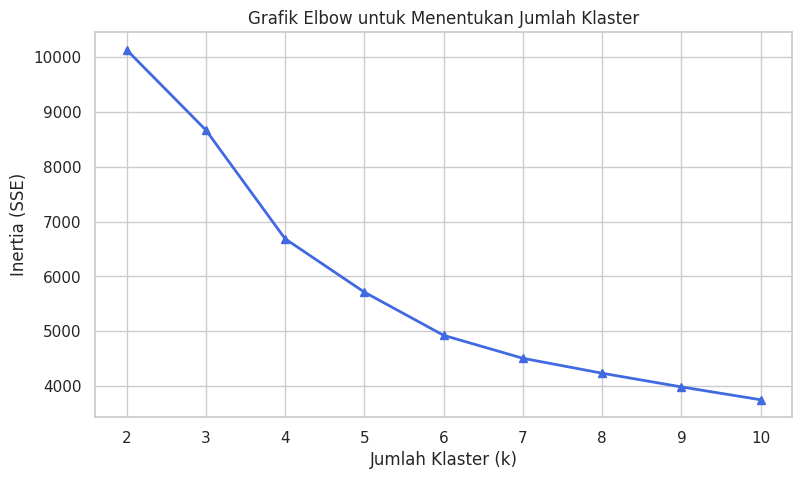

In [36]:
sse_scores = []
jumlah_cluster_dicoba = range(2, 11)

numerical_features = bank_data_df.select_dtypes(include=np.number).columns
bank_data_num = bank_data_df[numerical_features]

scaler = StandardScaler()
bank_data_df_scaled = scaler.fit_transform(bank_data_num)

for jumlah in jumlah_cluster_dicoba:
    kmeans = KMeans(n_clusters=jumlah, random_state=42, n_init=10)
    kmeans.fit(bank_data_df_scaled)
    sse_scores.append(kmeans.inertia_)

plt.figure(figsize=(9, 5))
plt.plot(jumlah_cluster_dicoba, sse_scores, color='royalblue', marker='^', linewidth=2)
plt.title("Grafik Elbow untuk Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [37]:
skor_silhouette = {
    k: silhouette_score(bank_data_df_scaled,
                        KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(bank_data_df_scaled))
    for k in range(2, 11)
}

for k, skor in skor_silhouette.items():
    print(f"Skor Silhouette untuk {k} klaster: {skor:.4f}")

optimal_klaster = max(skor_silhouette, key=skor_silhouette.get)
print(f"Jumlah klaster terbaik: {optimal_klaster}")

model_final = KMeans(n_clusters=optimal_klaster, random_state=42, n_init=10)
bank_data_df['Cluster'] = model_final.fit_predict(bank_data_df_scaled)

Skor Silhouette untuk 2 klaster: 0.2260
Skor Silhouette untuk 3 klaster: 0.2403
Skor Silhouette untuk 4 klaster: 0.2606
Skor Silhouette untuk 5 klaster: 0.2480
Skor Silhouette untuk 6 klaster: 0.2619
Skor Silhouette untuk 7 klaster: 0.2378
Skor Silhouette untuk 8 klaster: 0.2304
Skor Silhouette untuk 9 klaster: 0.2343
Skor Silhouette untuk 10 klaster: 0.2378
Jumlah klaster terbaik: 6


In [38]:
bank_data_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,5
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,5
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2


## **c. Feature Selection (Opsional)**

In [39]:
numerical_columns = ['TransactionAmount', 'CustomerAge']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bank_data_df[numerical_columns])

selector = VarianceThreshold(threshold=0.01)
df_selected = selector.fit_transform(df_scaled)

print(f"Jumlah fitur sebelum seleksi: {df_scaled.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {df_selected.shape[1]}")

Jumlah fitur sebelum seleksi: 2
Jumlah fitur setelah seleksi: 2


In [40]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [41]:
silhouette_vals = {}
silhouette_pca = {}

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(bank_data_num)

    score = silhouette_score(bank_data_num, labels)
    silhouette_vals[k] = score
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

    model_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = model_pca.fit_predict(df_pca)
    score_pca = silhouette_score(df_pca, labels_pca)
    silhouette_pca[k] = score_pca
    print(f"Silhouette Score untuk {k} cluster setelah PCA: {score_pca:.4f}")


optimal_k_pca = max(silhouette_pca, key=silhouette_pca.get)
print(f"Jumlah cluster optimal setelah Feature Selection: {optimal_k_pca}")

df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns, index=bank_data_df.index)

final_model_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled['Cluster_PCA'] = final_model_pca.fit_predict(df_pca)

Silhouette Score untuk 2 cluster: 0.6181
Silhouette Score untuk 2 cluster setelah PCA: 0.4154
Silhouette Score untuk 3 cluster: 0.6236
Silhouette Score untuk 3 cluster setelah PCA: 0.4696
Silhouette Score untuk 4 cluster: 0.5968
Silhouette Score untuk 4 cluster setelah PCA: 0.4503
Silhouette Score untuk 5 cluster: 0.5712
Silhouette Score untuk 5 cluster setelah PCA: 0.4223
Silhouette Score untuk 6 cluster: 0.5338
Silhouette Score untuk 6 cluster setelah PCA: 0.4042
Silhouette Score untuk 7 cluster: 0.4796
Silhouette Score untuk 7 cluster setelah PCA: 0.4070
Silhouette Score untuk 8 cluster: 0.4741
Silhouette Score untuk 8 cluster setelah PCA: 0.3910
Silhouette Score untuk 9 cluster: 0.4585
Silhouette Score untuk 9 cluster setelah PCA: 0.3831
Silhouette Score untuk 10 cluster: 0.4453
Silhouette Score untuk 10 cluster setelah PCA: 0.3848
Jumlah cluster optimal setelah Feature Selection: 3


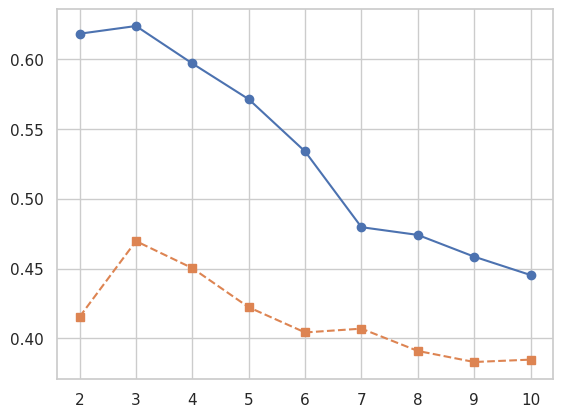

In [42]:
plt.plot(silhouette_vals.keys(), silhouette_vals.values(), marker='o', label="Sebelum Feature Selection")
plt.plot(silhouette_pca.keys(), silhouette_pca.values(), marker='s', linestyle='dashed', label="Sesudah Feature Selection")

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

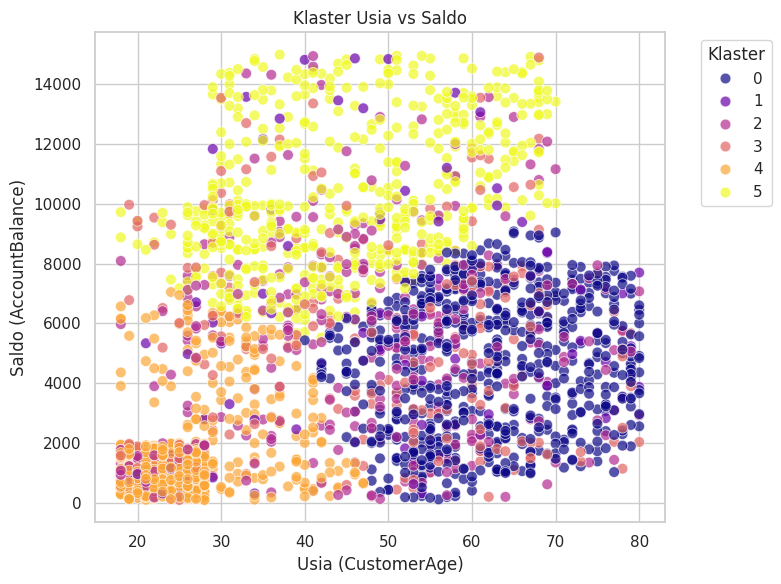

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=bank_data_df,
    x='CustomerAge',
    y='AccountBalance',
    hue='Cluster',
    palette='plasma',
    alpha=0.7,
    s=60
)

plt.title('Klaster Usia vs Saldo')
plt.xlabel('Usia (CustomerAge)')
plt.ylabel('Saldo (AccountBalance)')
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [44]:
encoded_columns = [col for col in bank_data_df.columns if col.startswith('Occ_')]

if encoded_columns:

    bank_data_df['CustomerOccupation_Original'] = (
        bank_data_df[encoded_columns]
        .idxmax(axis=1)
        .str.replace("Occ_", "")
    )

    bank_data_df.drop(columns=encoded_columns, inplace=True)

    bank_data_df.rename(
        columns={'CustomerOccupation_Original': 'CustomerOccupation'},
        inplace=True
    )

selected_columns = [
    'TransactionAmount',
    'CustomerAge',
    'CustomerOccupation',
    'LoginAttempts',
    'AccountBalance',
    'Cluster'
]

print("Contoh data hasil inverse transform untuk interpretasi cluster:")
bank_data_df[selected_columns].head(10)


Contoh data hasil inverse transform untuk interpretasi cluster:


,TransactionAmount,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,Cluster
0,14.09,70,Doctor,1,5112.21,0
1,376.24,68,Doctor,1,13758.91,5
2,126.29,19,Student,1,1122.35,4
3,184.50,26,Student,1,8569.06,5
4,13.45,26,Student,1,7429.40,2
5,92.15,18,Student,1,781.68,4
6,7.08,37,Doctor,1,13316.71,5
7,171.42,67,Retired,1,2796.24,2
8,106.23,51,Engineer,1,9095.14,5
9,815.96,55,Doctor,1,1021.88,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [45]:
# Saya tidak menerapkan metode normalisasi atau standardisasi pada dataset ini

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [46]:
clusters = bank_data_df['Cluster'].unique()

for c in sorted(clusters):
    data_per_cluster = bank_data_df[bank_data_df['Cluster'] == c]
    print(f"\n>>> Karakteristik Cluster {c}")
    summary = data_per_cluster[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']].describe()
    print(summary)

    avg_amount = summary.loc['mean', 'TransactionAmount']
    avg_age = summary.loc['mean', 'CustomerAge']
    avg_duration = summary.loc['mean', 'TransactionDuration']
    avg_balance = summary.loc['mean', 'AccountBalance']

    print(f"Interpretasi Cluster {c}:")
    print(f"- Rata-rata transaksi: ${avg_amount:.2f}")
    print(f"- Rata-rata usia pelanggan: {avg_age:.1f} tahun")
    print(f"- Rata-rata durasi transaksi: {avg_duration:.1f} detik")
    print(f"- Rata-rata saldo: ${avg_balance:.2f}")

    if avg_amount > 1000:
        print("- Cluster ini cenderung berisi transaksi besar.")
    if avg_balance > 7000:
        print("- Pelanggan dalam cluster ini memiliki saldo tinggi.")
    if avg_age < 30:
        print("- Cluster ini didominasi oleh pelanggan muda.")


>>> Karakteristik Cluster 0
       TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
count         652.000000    652.00000           652.000000      652.000000
mean          199.628451     62.32362            91.783742     4592.400307
std           158.511502      9.51357            47.137712     2215.587847
min             0.840000     40.00000            10.000000      120.890000
25%            61.977500     55.00000            52.000000     2609.875000
50%           159.760000     62.00000            89.000000     4708.640000
75%           310.547500     70.00000           132.000000     6454.422500
max           651.550000     80.00000           204.000000     9073.170000
Interpretasi Cluster 0:
- Rata-rata transaksi: $199.63
- Rata-rata usia pelanggan: 62.3 tahun
- Rata-rata durasi transaksi: 91.8 detik
- Rata-rata saldo: $4592.40

>>> Karakteristik Cluster 1
       TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
count          95.000000    9

#### Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans :

**Cluster 0**
* **Rata-rata Jumlah Transaksi ($):** 199.63

* **Rata-rata Usia Pelanggan (tahun):** 62.32

* **Rata-rata Durasi Transaksi (detik):** 91.78

* **Rata-rata Saldo Akun ($)**: 4,592.40

* **Analisis:**
Cluster ini terdiri dari pelanggan berusia matang dengan saldo cukup stabil dan transaksi sedang. Mereka berhati-hati dalam berbelanja dan tidak terburu-buru. Produk yang cocok adalah tabungan jangka panjang atau deposito.

**Cluster 1**
* **Rata-rata Jumlah Transaksi ($):** 276.32

* **Rata-rata Usia Pelanggan (tahun):** 44.54

* **Rata-rata Durasi Transaksi (detik):** 131.88

* **Rata-rata Saldo Akun ($):** 1,582.5,461.64

* **Analisis:**
Pelanggan di cluster ini relatif lebih muda dan cukup aktif bertransaksi dengan saldo menengah. Mereka potensial untuk program loyalitas, promo menarik, atau penawaran cashback dan diskon khusus.

**Cluster 2**
* **Rata-rata Jumlah Transaksi ($):** 234.87

* **Rata-rata Usia Pelanggan (tahun):** 47.35

* **Rata-rata Durasi Transaksi (detik):** 234.93

* **Rata-rata Saldo Akun ($):** 4,830.76

* **Analisis:**
Cluster ini memiliki durasi transaksi paling panjang, menunjukkan pelanggan yang teliti dan mempertimbangkan keputusan belanja. Strategi yang cocok adalah edukasi produk atau rekomendasi lebih mendetail.

**Cluster 3**
* **Rata-rata Jumlah Transaksi ($):** 939.91

* **Rata-rata Usia Pelanggan (tahun):** 46.25

* **Rata-rata Durasi Transaksi (detik):** 113.68

* **Rata-rata Saldo Akun ($):** 4,987.69

* **Analisis:**
Pelanggan di cluster ini memiliki transaksi tinggi dengan saldo menengah hingga tinggi. Mereka cocok untuk produk premium atau eksklusif, seperti paket investasi atau layanan keuangan khusus.

**Cluster 4**
* **Rata-rata Jumlah Transaksi ($):** 236.42

* **Rata-rata Usia Pelanggan (tahun):** 25.84

* **Rata-rata Durasi Transaksi (detik):** 97.20

* **Rata-rata Saldo Akun ($):** 1,612.88

* **Analisis:**
Cluster ini didominasi pelanggan muda dengan saldo rendah dan transaksi menengah. Strategi pemasaran yang cocok adalah promo ringan, cicilan, atau produk lifestyle yang menarik generasi muda.


**Cluster 5**
* **Rata-rata Jumlah Transaksi ($):** 224.02

* **Rata-rata Usia Pelanggan (tahun):** 44.77

* **Rata-rata Durasi Transaksi (detik):** 100.77

* **Rata-rata Saldo Akun ($):** 10,265.91

* **Analisis:**
Pelanggan di cluster ini memiliki saldo sangat tinggi dengan transaksi menengah. Mereka cocok untuk produk premium, investasi besar, atau layanan keuangan eksklusif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [47]:
bank_data_df.to_csv("dataset_inisiasi.csv", index=False)
print("Hasil clustering telah berhasil disimpan dalam file dataset_inisiasi.csv")

Hasil clustering telah berhasil disimpan dalam file dataset_inisiasi.csv
